# IMPORTS AND LOAD **DATA**

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers

In [0]:
#load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# DATA **PREPROCESSING**

In [48]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

('Train matrix shape', (60000, 784))
('Test matrix shape', (10000, 784))


# **MODEL**

In [0]:
model = Sequential()
model.add(Dense(532, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(532))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


# **ADAGRAD**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2326 - acc: 0.9307 - val_loss: 0.1021 - val_acc: 0.9668
Epoch 2/10
 - 9s - loss: 0.0981 - acc: 0.9703 - val_loss: 0.0844 - val_acc: 0.9725
Epoch 3/10
 - 9s - loss: 0.0703 - acc: 0.9782 - val_loss: 0.0686 - val_acc: 0.9780
Epoch 4/10
 - 9s - loss: 0.0552 - acc: 0.9835 - val_loss: 0.0630 - val_acc: 0.9798
Epoch 5/10
 - 9s - loss: 0.0443 - acc: 0.9867 - val_loss: 0.0586 - val_acc: 0.9818
Epoch 6/10
 - 9s - loss: 0.0379 - acc: 0.9881 - val_loss: 0.0552 - val_acc: 0.9833
Epoch 7/10
 - 9s - loss: 0.0322 - acc: 0.9903 - val_loss: 0.0568 - val_acc: 0.9813
Epoch 8/10
 - 10s - loss: 0.0267 - acc: 0.9920 - val_loss: 0.0535 - val_acc: 0.9832
Epoch 9/10
 - 9s - loss: 0.0239 - acc: 0.9932 - val_loss: 0.0535 - val_acc: 0.9828
Epoch 10/10
 - 9s - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0521 - val_acc: 0.9844
('Test Loss', 0.05207886115615838)
('Test Accuracy', 0.9844)


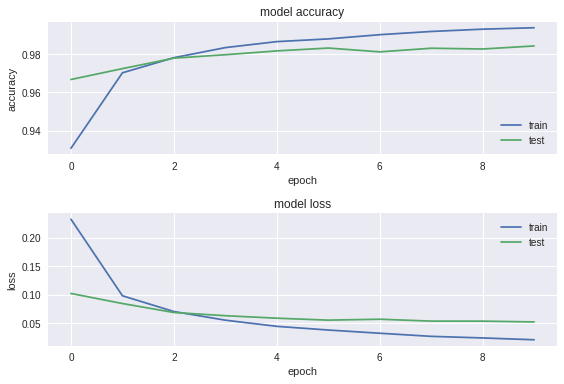

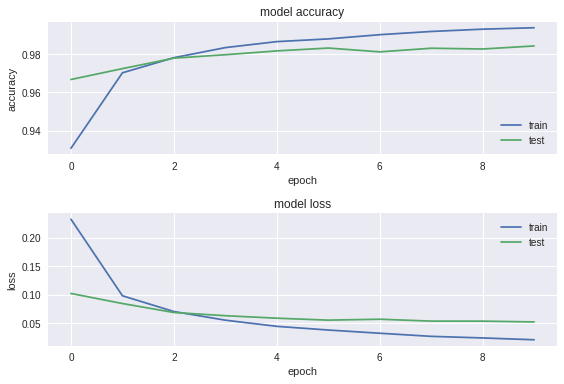

In [50]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adagrad)

r = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

m = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", m[0])
print("Test Accuracy", m[1])


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# **SGD**

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 9s - loss: 0.0178 - acc: 0.9949 - val_loss: 0.0536 - val_acc: 0.9842
Epoch 2/8
 - 9s - loss: 0.0166 - acc: 0.9953 - val_loss: 0.0512 - val_acc: 0.9849
Epoch 3/8
 - 9s - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0530 - val_acc: 0.9846
Epoch 4/8
 - 9s - loss: 0.0144 - acc: 0.9960 - val_loss: 0.0519 - val_acc: 0.9848
Epoch 5/8
 - 9s - loss: 0.0137 - acc: 0.9964 - val_loss: 0.0539 - val_acc: 0.9840
Epoch 6/8
 - 9s - loss: 0.0134 - acc: 0.9964 - val_loss: 0.0538 - val_acc: 0.9844
Epoch 7/8
 - 10s - loss: 0.0126 - acc: 0.9963 - val_loss: 0.0552 - val_acc: 0.9845
Epoch 8/8
 - 10s - loss: 0.0116 - acc: 0.9971 - val_loss: 0.0538 - val_acc: 0.9839
('Test Loss', 0.05383037453621109)
('Test Accuracy', 0.9839)


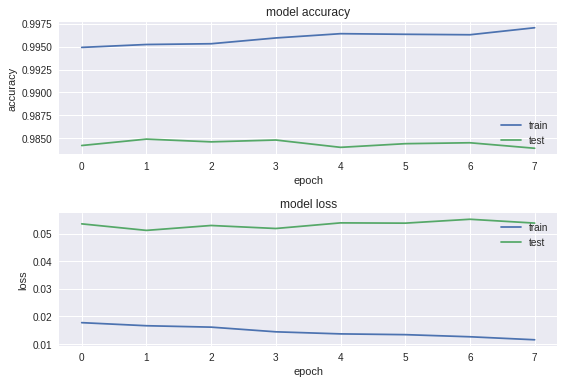

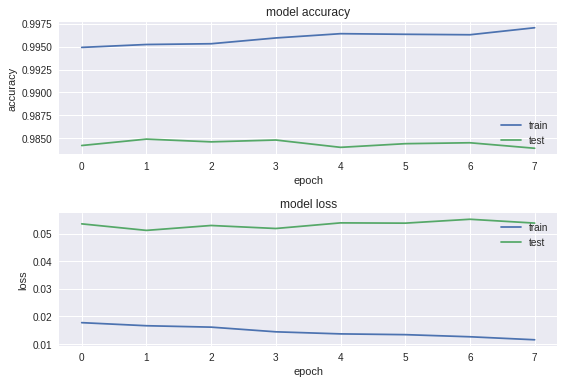

In [51]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

r = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

m = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", m[0])
print("Test Accuracy", m[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig